In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt   #We use matplotlib library for plotting
import matplotlib.image as mpimg  
import matplotlib.colors as clr
import numpy as np 
import cv2 as cv

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

Text(0.5, 1.0, 'Image after filtering w/ gaussian filter')

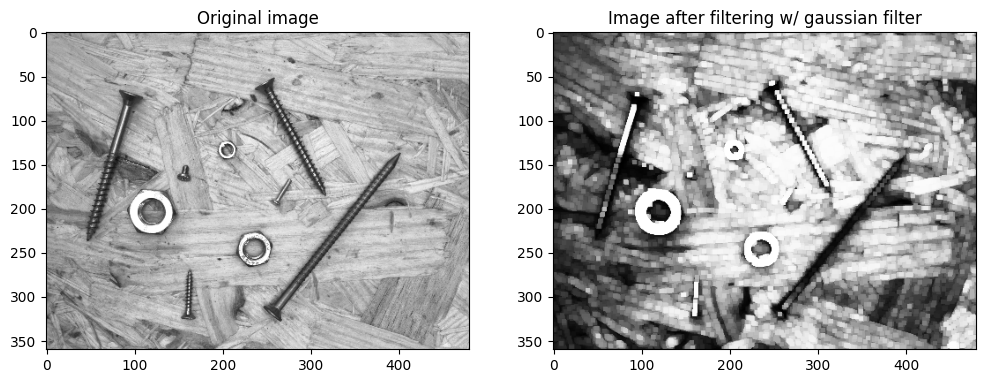

In [194]:
imge = cv.imread("../test_data/screws_047.png", 0)
imge = cv.cvtColor(imge, cv.COLOR_BGR2RGB)
imge = cv.resize(imge, (480, 360))
img = cv.cvtColor(imge, cv.COLOR_RGB2GRAY)

kernel = np.ones((3,3),np.uint8)
img = cv.dilate(img,kernel,iterations = 1)
img = cv.equalizeHist(img)
img = cv.dilate(img, kernel, iterations = 1)
fig, axs = plt.subplots(1,2)
axs[0].imshow(imge, cmap = 'gray')
axs[0].set_title('Original image')
axs[1].imshow(img, cmap = 'gray')
axs[1].set_title('Image after filtering w/ gaussian filter')

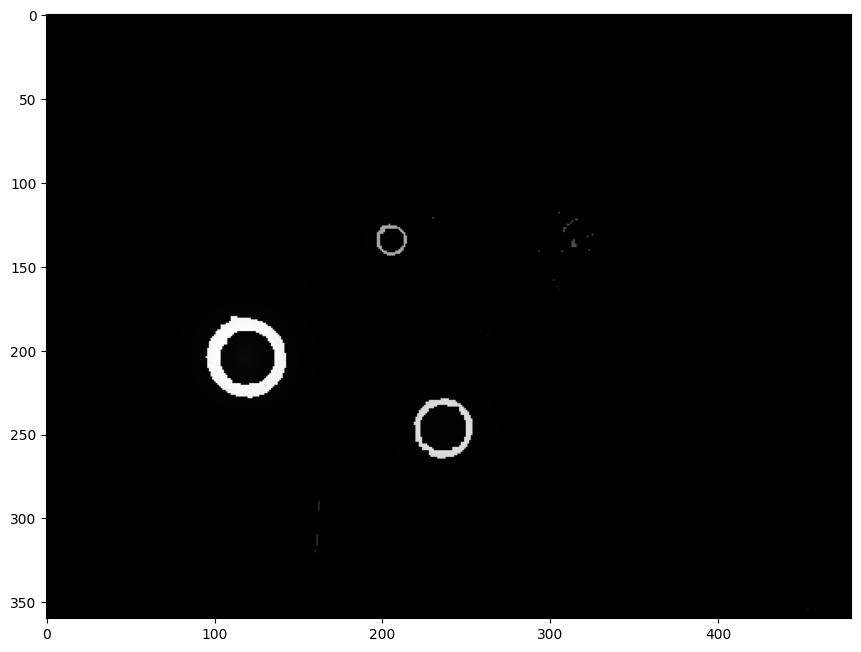

In [195]:
_, thresh = cv.threshold(img, 251, 256, cv.THRESH_BINARY)
kernel = np.ones((5,5), np.uint8)
thresh = cv.erode(thresh, kernel, iterations = 1)
#thresh = cv.GaussianBlur(thresh, (3,3), 0)
thresh = cv.bilateralFilter(thresh,50,100,100)
plt.imshow(thresh, cmap = 'gray')

4


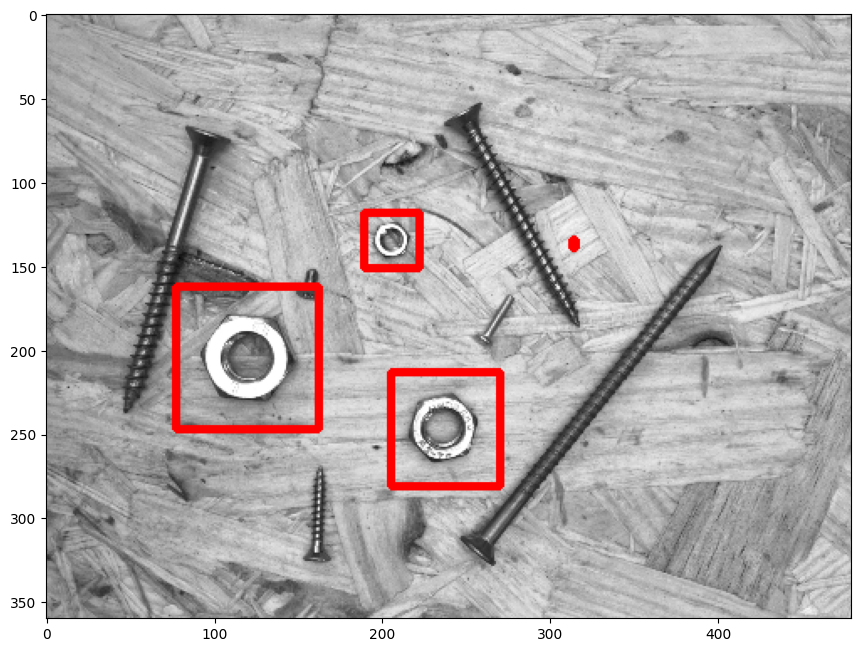

In [189]:
fidelity = False
fidelityValue = 1.7

copy1 = imge.copy()
c, h = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
fidelityRange = 1.4
if fidelity:
    maxArea = .0
    for i in c: # With images it is convenient to know the greater area
        area = cv.contourArea(i)
        if area > maxArea:
            maxArea = area
    fidelityRange = maxArea - (maxArea * fidelityValue) # If objects have same size it prevents false detection

totalContours = 0

br = []
for i in range(len(c)):
    if h[0][i][3] == -1 and cv.contourArea(c[i]) >= fidelityRange:
        totalContours += 1
        approx = cv.approxPolyDP(c[i], 3, True)
        br.append(cv.boundingRect(approx))
for b in br:
    cv.rectangle(copy1, (b[0], b[1]), (b[0] + b[2], b[1] + b[3]), (255, 0, 0), 3) 
plt.imshow(copy1)
print(totalContours)

2


Text(0.5, 1.0, 'Image w/ Detected Hough Circles')

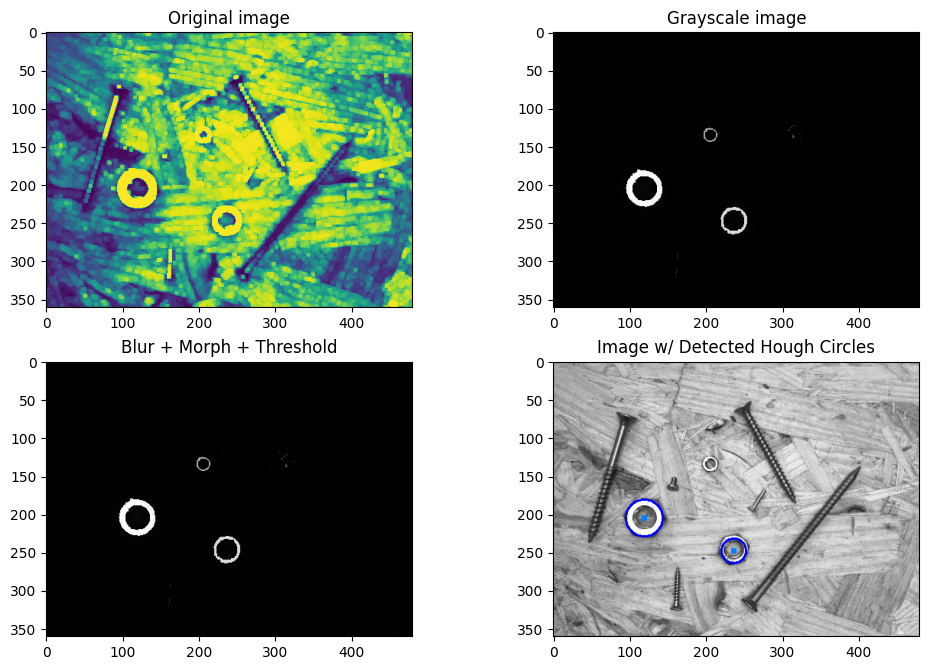

In [190]:
copy = imge.copy()
size = (np.max(thresh))/16
circles = cv.HoughCircles(thresh, cv.HOUGH_GRADIENT, 1.5, size, param1=300, param2=25, minRadius=0,maxRadius=50)
num = len(circles[0])
print(len(circles[0]))
if circles is not None:
    circles = np.round(circles[0, :]).astype("int")

    for (x, y, r) in circles:
        cv.circle(copy, (x, y), r, (0, 0, 255), 2)
        cv.rectangle(copy, (x - 3, y - 3), (x + 3, y + 3), (0, 128, 255), -1)
        
fig, axs = plt.subplots(2,2)
axs[0,0].imshow(img)
axs[0,0].set_title('Original image')
axs[0,1].imshow(thresh, cmap = 'gray')
axs[0,1].set_title('Grayscale image')
axs[1,0].imshow(thresh, cmap = 'gray')
axs[1,0].set_title('Blur + Morph + Threshold')
axs[1,1].imshow(copy)
axs[1,1].set_title('Image w/ Detected Hough Circles')

Total number of objects:
3


Text(0.5, 1.0, 'Image w/ Detected Hough Circles')

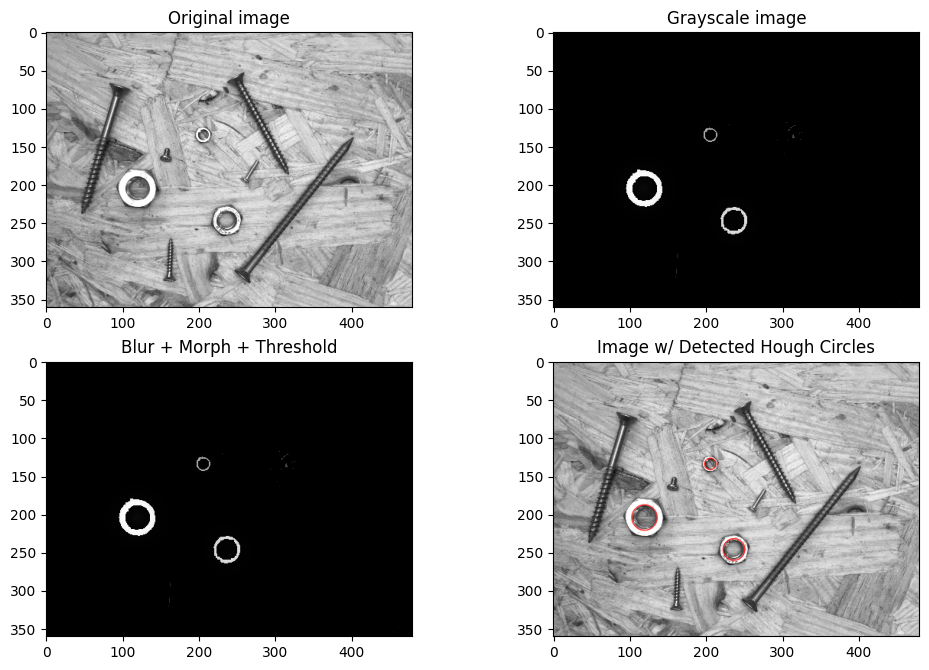

In [191]:
imcopy = imge.copy()

params = cv.SimpleBlobDetector_Params()

params.filterByColor = True
params.blobColor = 0

params.filterByArea = True
params.minArea = 50

params.filterByCircularity = True
params.minCircularity = 0.8

ver = (cv.__version__).split('.')
if int(ver[0]) < 3:
    detector = cv.SimpleBlobDetector(params)
else:
    detector = cv.SimpleBlobDetector_create(params)

keypoints = detector.detect(thresh)

im_with_keypoints = cv.drawKeypoints (imcopy, keypoints, np.array([]), (255,0,0), cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

print("Total number of objects:")
print(len(keypoints))

fig, axs = plt.subplots(2,2)
axs[0,0].imshow(imge)
axs[0,0].set_title('Original image')
axs[0,1].imshow(thresh, cmap = 'gray')
axs[0,1].set_title('Grayscale image')
axs[1,0].imshow(thresh, cmap = 'gray')
axs[1,0].set_title('Blur + Morph + Threshold')
axs[1,1].imshow(im_with_keypoints)
axs[1,1].set_title('Image w/ Detected Hough Circles')